In [1]:
#1
import pandas as pd;
import numpy as np;
df=pd.read_csv('tvmarketing.csv');
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [2]:
#2
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
#2 datatypes of cols
df[['TV','Sales']].dtypes
print(df.dtypes)

TV       float64
Sales    float64
dtype: object


In [4]:
#3shape of rows and cols
df.shape

(200, 2)

In [5]:
#4summary statictics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


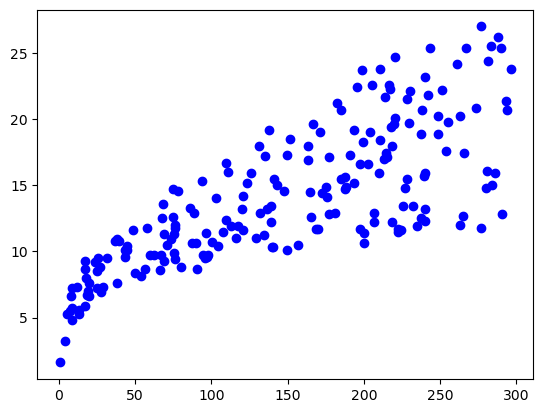

In [6]:
#5relation b/w features and dependent variable
import matplotlib.pyplot as plt



plt.scatter(df['TV'],df['Sales'],color='blue')

In [7]:
#6 Prepare X (feature variables) and y (response variable)
X=df.iloc[:,:1].values#independent var df[['TV']]
Y=df.iloc[:,-1].values#dependent var   df['Sales']
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [8]:
# 7 split the data into train and test
from sklearn.model_selection import train_test_split

In [9]:
#8
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 1), (40, 1), (160,), (40,))

In [10]:
#11 perform linear 
from sklearn.linear_model import LinearRegression
model =LinearRegression()
#training
model.fit(X_train,y_train)

LinearRegression()

In [11]:
#12 perform coef,and intercept
model.intercept_
model.coef_

array([0.04666342])

In [12]:
#13
y_pred=model.intercept_+model.coef_*9.3
y_pred

array([7.59131282])

In [13]:
model.predict([[9.3]])

array([7.59131282])

In [14]:
y_pred=model.predict(X_test)


In [15]:
from sklearn.metrics import r2_score
y=r2_score(y_pred,y_test)
print(y)

0.21486420465195377


In [16]:
# Calculate performance metrics mean square
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 2.7674260844784677
Mean Squared Error (MSE): 11.368731675206245
Root Mean Squared Error (RMSE): 3.371754984456351
R² Score: 0.605606282549622


In [17]:
# Predict sales for the test data
#make prediction
y_pred = model.predict(X_test)

# Display the first 5 predictions
print("Predicted Sales:", y_pred[:5])


Predicted Sales: [20.82505872 11.6230323  16.48069432 16.9893256  13.27491737]


In [18]:
X_t = X_test.reshape(-1,1)

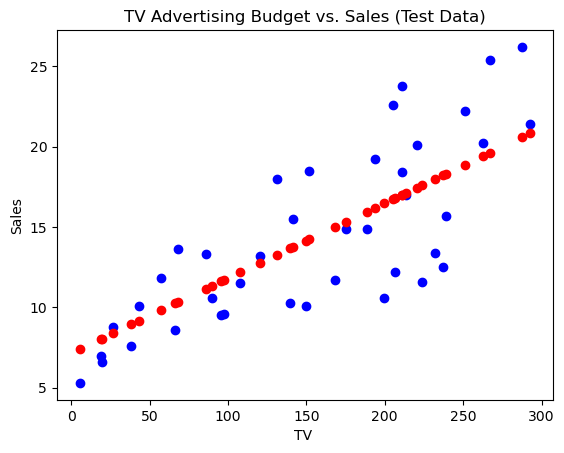

In [19]:
15 #plot the test data

import matplotlib.pyplot as plt

plt.scatter(X_t, y_test, color='blue', label='Actual Data')

plt.scatter(X_t, y_pred, color='red', label='Predicted Data')

plt.xlabel("TV ")
plt.ylabel("Sales")
plt.title("TV Advertising Budget vs. Sales (Test Data)")

plt.show()


In [20]:
x_train=X_train.reshape(-1,1)

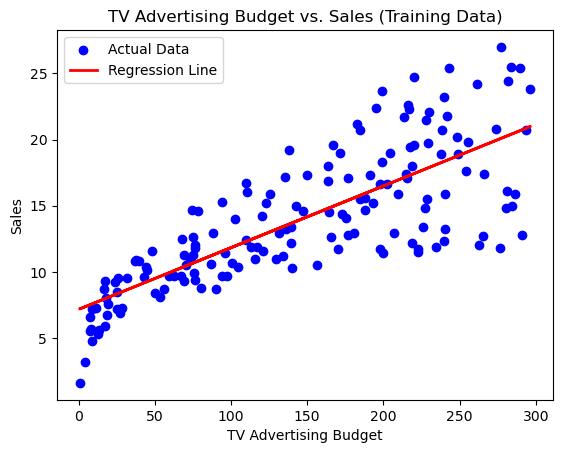

In [21]:
14 #train plot
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, color='blue', label='Actual Data')

plt.plot(x_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')

plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("TV Advertising Budget vs. Sales (Training Data)")

plt.legend()

plt.show()


In [22]:
# 17 cal R_square and Adjusted_square
SS_res = sum((y_test - y_pred) ** 2)  
SS_tot = sum((y_test - y_test.mean()) ** 2) 

R2 = 1 - (SS_res / SS_tot)  

n = len(y_test) 
k = X_test.shape[1] 
# Calculate Adjusted R-Squared
R2_adj = 1 - ((1 - R2) * (n - 1) / (n - k - 1))

# Print results
print("R-Squared:", R2)
print("Adjusted R-Squared:", R2_adj)


R-Squared: 0.605606282549622
Adjusted R-Squared: 0.5952275005114542


In [23]:
#16
x=mean_squared_error(y_pred,y_test)
y=r2_score(y_pred,y_test)
print(y)
print(x)

0.21486420465195377
11.368731675206245


In [29]:
from sklearn.tree import plot_tree

help(plot_tree)

Help on function plot_tree in module sklearn.tree._export:

plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)
    Plot a decision tree.
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    The visualization is fit automatically to the size of the axis.
    Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
    the size of the rendering.
    
    Read more in the :ref:`User Guide <tree>`.
    
    .. versionadded:: 0.21
    
    Parameters
    ----------
    decision_tree : decision tree regressor or classifier
        The decision tree to be plotted.
    
    max_depth : int, default=None
        The maximum depth of the representation. If None, the tree is fully
        generated.
    
    feature_names : list of str, default=None
        Names of